In [1]:
import warnings
import pandas as pd
import numpy as np

apple = pd.read_excel("data/APPL DATA.xlsx")
apple["Date"] = pd.to_datetime(apple["Date"])
apple = apple.set_index(["Date"])
apple = apple.sort_index()
apple = apple["Last Price"].dropna()

In [2]:
from CATSpredict import CATS

In [4]:
cat = CATS(apple, pbar=True)

/Users/jeraldteo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


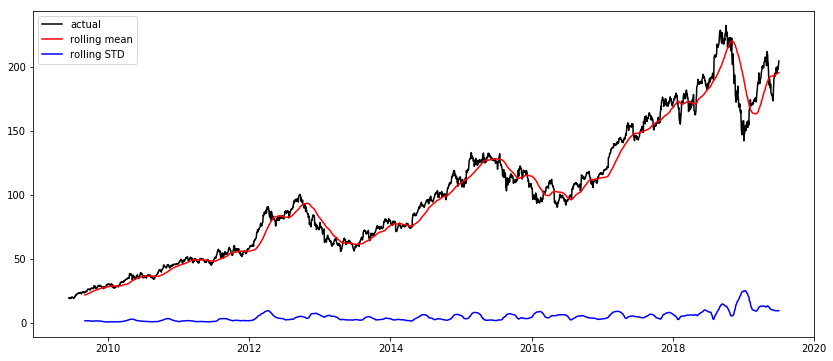

Stationarity Test (at 5% level)
Augmented Dickey-Fuller Test: H0 not rejected, Unit Root present (series is non-stationary)
------------------------------------------------------------------------------------------------ 

Trend Stationarity Tests (at 5% level)
Augmented Dickey-Fuller Test: H0 not rejected, series has non-stationary trend
KPSS Test: H0 rejected, series has non-stationary trend
------------------------------------------------------------------------------------------------ 

Seasonality Visualisation:


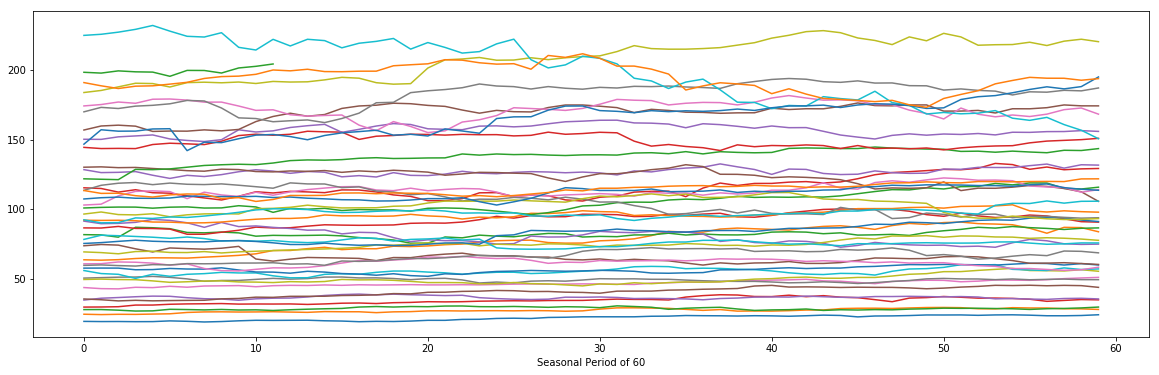

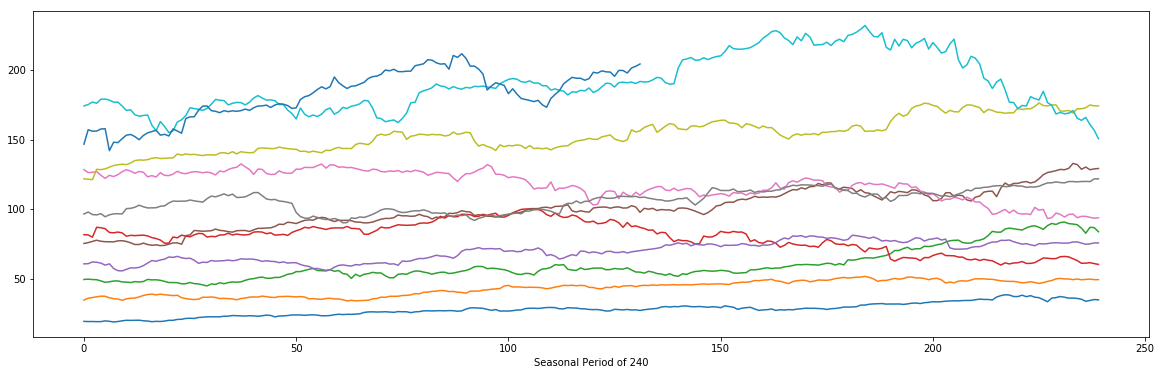

In [4]:
cat.analysis(season=[60, 240])

In [5]:
cat.non_seasonal()

ARIMA(1) in progress


Forecast Test: 100%|██████████| 20/20 [01:16<00:00,  4.23s/it]


ARIMA(2) in progress


HoltWinters Grid Search:   0%|          | 0/2 [00:00<?, ?it/s]

HoltWinters in progress


Forecast Test: 100%|██████████| 20/20 [00:22<00:00,  1.15s/it]


,ARIMA(0),ARIMA(1),ARIMA(2),HoltWinters
model_parameter,Non-Stationary,"(4, 1, 3)","(4, 2, 3)","(add,)"
model AIC,Non-Stationary,10103,10112.2,2948.2
residual IID,Non-Stationary,False,False,False
Mean ABS % Error,Non-Stationary,0.976737,0.965518,0.981148
MAE/Fluctuation %,Non-Stationary,190.154,187.97,191.012
residual ARCH effect,Non-Stationary,True,True,True
GARCH_parameter,Non-Stationary,"(1, 2)","(1, 2)","(1, 2)"
standardised resid IID,Non-Stationary,True,True,True
standardised resid ARCH,Non-Stationary,False,False,False


In [24]:
cat.predict_with_bestmodel()

/Users/jeraldteo/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:578: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


{'forecast': 204.30247683181824,
 'ARIMA_interval': [200.8214848244666, 207.78346883916987],
 'GARCH_interval': [198.46041983422612, 210.16733446169766]}

In [5]:
bestmodelCI = cat.onestep_CIfc(cat.series, 20, (1,2), order=(4,2,3))
bestmodelCI.head()

Forecast CI Test:   5%|▌         | 1/20 [00:02<00:38,  2.02s/it]/Users/jeraldteo/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:578: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
Forecast CI Test:  10%|█         | 2/20 [00:04<00:36,  2.04s/it]/Users/jeraldteo/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:578: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
Forecast CI Test:  15%|█▌        | 3/20 [00:06<00:38,  2.26s/it]/Users/jeraldteo/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:578: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning

,actual,predict,difference,ari_lower,ari_upper,garch_lower,garch_upper
date,,,,,,,
2019-06-06,185.22,182.081468,3.138532,178.610248,185.552688,175.558853,188.635411
2019-06-07,190.15,185.624367,4.525633,182.151670,189.097064,178.939383,192.339332
2019-06-10,192.58,189.537310,3.042690,186.060927,193.013693,182.860918,196.241722
2019-06-11,194.81,192.215375,2.594625,188.733287,195.697463,185.465250,198.990069
2019-06-12,194.19,194.224598,-0.034598,190.746975,197.702221,187.659887,200.815314


Root Mean Square Error: 2.3760513033297834
RMSE / Mean (%): 1.20839004489651 %
Mean Absolute Percentage Error (%): 0.9655180215228898 %
Mean Fluctuation each day: 1.0099999999999998
MAE / Mean Fluctuation (%): 187.9696295178566 %


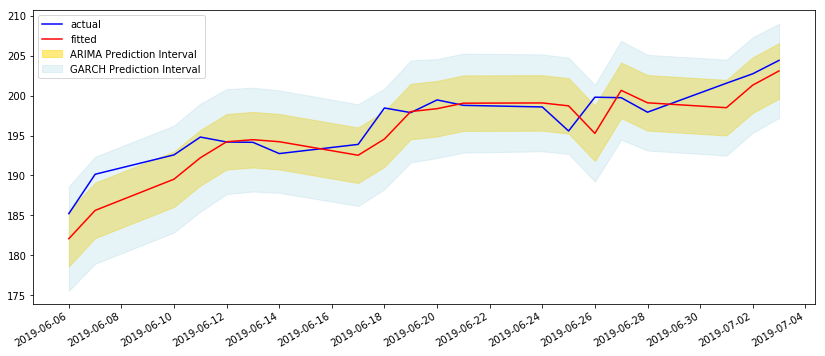

In [6]:
cat.analyse_fit_auto(bestmodelCI, day_interval=2)